In [1]:
"""
Assume a matrix multiplication workload and a two-level hardware.
I'm assuming two loops per rank variable.
The goal is to see how many mappings always result in the exact same cost.

For example, the following two mappings should have the same cost:
```
# Note the following two loops
for m
 for n
  GLB keeps Z
   for m
    for k
     GLB keeps A
      for k
       for n
        GLB keeps B
```
and
```
# Note the following two loops
for n
 for m
  GLB keeps Z
   for m
    for k
     GLB keeps A
      for k
       for n
        GLB keeps B
```
"""

"\nAssume a matrix multiplication workload and a two-level hardware.\nI'm assuming two loops per rank variable.\nThe goal is to see how many mappings always result in the exact same cost.\n\nFor example, the following two mappings should have the same cost:\n```\n# Note the following two loops\nfor m\n for n\n  GLB keeps Z\n   for m\n    for k\n     GLB keeps A\n      for k\n       for n\n        GLB keeps B\n```\nand\n```\n# Note the following two loops\nfor n\n for m\n  GLB keeps Z\n   for m\n    for k\n     GLB keeps A\n      for k\n       for n\n        GLB keeps B\n```\n"

In [2]:
from math import factorial

n_levels = 4 # Levels for which we explore dataflow. GLB and local buffer
n_tensors = 3
n_mappings_ours = factorial(n_tensors) ** n_levels

mapping_count = []
canonical_mapping_count = []

for n_virtual_levels in range(1, n_levels * n_tensors):
    n_perms = factorial(n_virtual_levels * n_tensors) // (factorial(n_virtual_levels) ** n_tensors)
    n_canonical_mappings = n_mappings_ours
    mapping_count.append(n_perms)
    canonical_mapping_count.append(n_canonical_mappings)

avg_redundancy = [m / c for m, c in zip(mapping_count, canonical_mapping_count)]

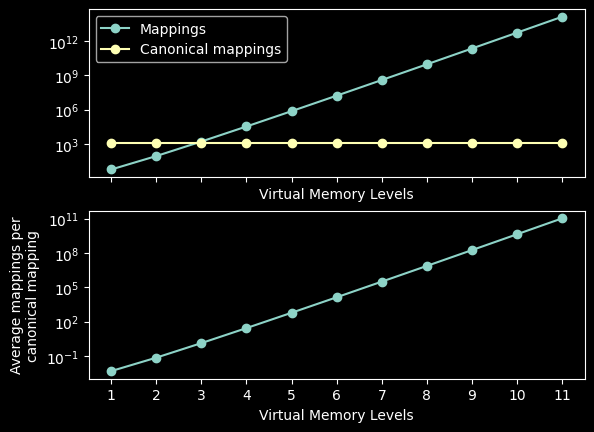

In [4]:
from matplotlib import pyplot as plt

avg_redundancy = [m / c for m, c in zip(mapping_count, canonical_mapping_count)]

fig, axes = plt.subplots(2, 1, sharex=True)
ax = axes[0]
ax.plot(range(1, len(avg_redundancy)+1), mapping_count, marker='o', label='Mappings')
ax.plot(range(1, len(avg_redundancy)+1), canonical_mapping_count, marker='o', label='Canonical mappings')
ax.set_xticks(range(1, len(avg_redundancy)+1))
ax.set_xlabel('Virtual Memory Levels')
ax.set_yscale('log')
ax.legend()

ax = axes[1]
avg_redundancy = [m / c for m, c in zip(mapping_count, canonical_mapping_count)]
ax.plot(range(1, len(avg_redundancy)+1), avg_redundancy, marker='o')
ax.set_xticks(range(1, len(avg_redundancy)+1))
ax.set_xlabel('Virtual Memory Levels')
ax.set_ylabel('Average mappings per\ncanonical mapping')
ax.set_yscale('log')